In [31]:
# Dependencies and Setup
# Not sure if I really neeed the time module since I'm just using datetime 
# to print the date on my charts...
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime 
import time
import json

# Import to use later for bold formatting
from IPython.display import Markdown, display

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Format date for latter use
date_capture = datetime.datetime.now()
current_date = date_capture.strftime("%m/%d/%Y")

# Declare output File (CSV), for later use
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

608


In [33]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set counters for use later
set_count = 1
counter = 1


#Print header for Data Retrieval
print( "Beginning Data Retrieval\n")  
print("-----------------------------\n")

# Set up empty list to be loaded
city_name_list = []
city_id_list = []
city_cloudiness_list = []
city_country_list = []
city_date_list = []
city_humidity_list = []
city_lat_list = []
city_lng_list = []
city_max_temp_list = []
city_wind_speed_list = []


# For loop to go through our cities list and find the weather info for the city
for city in cities:
        
        # Try/ Except for error handling
        try:
            
            # Get weather data and turn into json format
            query_url = f"{base_url}appid={api_key}&q={city}&units=imperial"
            city_weather = requests.get(query_url).json()
            
            # This was a pretty print I used to get the right indexes for the assignments below
            # print(json.dumps(city_weather, indent=4, sort_keys=True))
            
            
            # Get required the weather info for the current city
            city_name = city_weather["name"]
            city_id = city_weather["id"]
            city_cloudiness = city_weather["clouds"]["all"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            city_humidity = city_weather["main"]["humidity"]
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_wind_speed = city_weather["wind"]["speed"]
            
            
            # Load the information into lists so we can make a DF later
            city_name_list.append(city_name)
            city_id_list.append(city_id)
            city_cloudiness_list.append(city_cloudiness)
            city_country_list.append(city_country)
            city_date_list.append(city_date)
            city_humidity_list.append(city_humidity)
            city_lat_list.append(city_lat)
            city_lng_list.append(city_lng)
            city_max_temp_list.append(city_max_temp)
            city_wind_speed_list.append(city_wind_speed)
           
            
            # Print the city and set if the city is found
            print(f"Processing Record {counter} of Set {set_count} | {city_name}")
            
            # Line I was using for error checking
            # print(city_name, city_id, city_cloudiness, city_country, city_date, city_humidity, city_lat, city_lng, city_max_temp, city_wind_speed)
            
            
            # Keep count of cities in set
            counter += 1
            
            
            # Limiter I was using during tesing
            #if set_count == 3:
                #break
                
            # Increase the set_count by 1 every time we retrive a group of 50 cities and reset counter   
            if counter % 51 == 0:
                set_count += 1
                counter = 1
                
        # Except block handle KeyErrors        
        except KeyError:
            
            # Format the exception output so it prnts in bold and is easier to see 
            # when we coudn't find a city
            bold = lambda word : display(Markdown(word))
            bold("**City not found.  Skipping...**")


            
# Footer for retrieval log
print("\n-----------------------------\n")             
print( "Data Retrieval Complete\n")  
print("-----------------------------\n")            



# Notes I kept for different ways to approch this.  Obvioulsy I chose to just use appended lists...     
# Put each city into a dict
# Build seperate lists for each weather feature as we itterate through the for loop

Beginning Data Retrieval

-----------------------------

Processing Record 1 of Set 1 | Butaritari
Processing Record 2 of Set 1 | Lagoa Formosa
Processing Record 3 of Set 1 | Westport


**City not found.  Skipping...**

Processing Record 4 of Set 1 | Mataura


**City not found.  Skipping...**

Processing Record 5 of Set 1 | Albany
Processing Record 6 of Set 1 | Komsomolskiy


**City not found.  Skipping...**

Processing Record 7 of Set 1 | Hualmay
Processing Record 8 of Set 1 | Bluff
Processing Record 9 of Set 1 | Bethel


**City not found.  Skipping...**

Processing Record 10 of Set 1 | Klaksvik
Processing Record 11 of Set 1 | Tuatapere
Processing Record 12 of Set 1 | Saldanha
Processing Record 13 of Set 1 | Touros
Processing Record 14 of Set 1 | Bambous Virieux
Processing Record 15 of Set 1 | Ahipara
Processing Record 16 of Set 1 | Alyangula
Processing Record 17 of Set 1 | Morant Bay
Processing Record 18 of Set 1 | Atuona
Processing Record 19 of Set 1 | Atbasar
Processing Record 20 of Set 1 | Kendari
Processing Record 21 of Set 1 | Longyearbyen
Processing Record 22 of Set 1 | Kiama
Processing Record 23 of Set 1 | Sao Joao da Barra
Processing Record 24 of Set 1 | Tommot
Processing Record 25 of Set 1 | Solnechnyy
Processing Record 26 of Set 1 | Iqaluit
Processing Record 27 of Set 1 | Faanui
Processing Record 28 of Set 1 | Tiksi
Processing Record 29 of Set 1 | Dunkirk
Processing Record 30 of Set 1 | Antofagasta
Processing Record 31 of Set 1 | Hofn
Processing Record 32 of Set 1 | Yellowknife


**City not found.  Skipping...**

Processing Record 33 of Set 1 | Porbandar
Processing Record 34 of Set 1 | Kodiak


**City not found.  Skipping...**

Processing Record 35 of Set 1 | Rikitea
Processing Record 36 of Set 1 | Souillac
Processing Record 37 of Set 1 | Arraial do Cabo
Processing Record 38 of Set 1 | Wukari
Processing Record 39 of Set 1 | Tasiilaq
Processing Record 40 of Set 1 | Lagoa
Processing Record 41 of Set 1 | Qianguo
Processing Record 42 of Set 1 | Agalatovo


**City not found.  Skipping...**

Processing Record 43 of Set 1 | Tura
Processing Record 44 of Set 1 | Busselton
Processing Record 45 of Set 1 | New Norfolk
Processing Record 46 of Set 1 | Qaanaaq
Processing Record 47 of Set 1 | Atar
Processing Record 48 of Set 1 | Provideniya


**City not found.  Skipping...**

Processing Record 49 of Set 1 | Nador


**City not found.  Skipping...**

Processing Record 50 of Set 1 | Nome
Processing Record 1 of Set 2 | Ushuaia
Processing Record 2 of Set 2 | Kant
Processing Record 3 of Set 2 | Hambantota
Processing Record 4 of Set 2 | Hilo
Processing Record 5 of Set 2 | Sambava
Processing Record 6 of Set 2 | Nikolskoye
Processing Record 7 of Set 2 | Coffs Harbour


**City not found.  Skipping...**

Processing Record 8 of Set 2 | Thompson
Processing Record 9 of Set 2 | Saint-Philippe
Processing Record 10 of Set 2 | Qasigiannguit


**City not found.  Skipping...**

Processing Record 11 of Set 2 | Cherskiy
Processing Record 12 of Set 2 | Castro
Processing Record 13 of Set 2 | Jamestown
Processing Record 14 of Set 2 | Upernavik
Processing Record 15 of Set 2 | Katsuura
Processing Record 16 of Set 2 | Biak
Processing Record 17 of Set 2 | Berlevag
Processing Record 18 of Set 2 | Ryotsu
Processing Record 19 of Set 2 | Khatanga
Processing Record 20 of Set 2 | Te Anau
Processing Record 21 of Set 2 | Torbay
Processing Record 22 of Set 2 | Mankono
Processing Record 23 of Set 2 | Vestmanna
Processing Record 24 of Set 2 | Mogadishu
Processing Record 25 of Set 2 | Cape Town
Processing Record 26 of Set 2 | Itacoatiara


**City not found.  Skipping...**

Processing Record 27 of Set 2 | Brodnica
Processing Record 28 of Set 2 | East London
Processing Record 29 of Set 2 | Vaini
Processing Record 30 of Set 2 | Kapaa
Processing Record 31 of Set 2 | Maceio
Processing Record 32 of Set 2 | Koumac
Processing Record 33 of Set 2 | Talcahuano
Processing Record 34 of Set 2 | Leningradskiy
Processing Record 35 of Set 2 | Aleppo
Processing Record 36 of Set 2 | Christchurch
Processing Record 37 of Set 2 | Tuktoyaktuk
Processing Record 38 of Set 2 | Port Macquarie
Processing Record 39 of Set 2 | Bredasdorp
Processing Record 40 of Set 2 | Kavieng
Processing Record 41 of Set 2 | Soledade


**City not found.  Skipping...**

Processing Record 42 of Set 2 | Punta Arenas
Processing Record 43 of Set 2 | Rawson
Processing Record 44 of Set 2 | Hay River
Processing Record 45 of Set 2 | Bilma
Processing Record 46 of Set 2 | Cap Malheureux
Processing Record 47 of Set 2 | Hobart
Processing Record 48 of Set 2 | Itarema
Processing Record 49 of Set 2 | Sibu
Processing Record 50 of Set 2 | Mazatlan
Processing Record 1 of Set 3 | Champerico
Processing Record 2 of Set 3 | Ulaanbaatar
Processing Record 3 of Set 3 | Saint George
Processing Record 4 of Set 3 | Omboue
Processing Record 5 of Set 3 | Ancud


**City not found.  Skipping...**

Processing Record 6 of Set 3 | Norman Wells
Processing Record 7 of Set 3 | Chokurdakh
Processing Record 8 of Set 3 | Esperance
Processing Record 9 of Set 3 | Fort-Shevchenko
Processing Record 10 of Set 3 | Cabedelo
Processing Record 11 of Set 3 | Namibe
Processing Record 12 of Set 3 | Mackay
Processing Record 13 of Set 3 | Piacabucu
Processing Record 14 of Set 3 | Ilulissat
Processing Record 15 of Set 3 | Impfondo
Processing Record 16 of Set 3 | Liwonde
Processing Record 17 of Set 3 | Ottawa
Processing Record 18 of Set 3 | Sur
Processing Record 19 of Set 3 | Puerto Leguizamo
Processing Record 20 of Set 3 | Mahajanga
Processing Record 21 of Set 3 | Santiago del Estero
Processing Record 22 of Set 3 | Faya
Processing Record 23 of Set 3 | Hermanus
Processing Record 24 of Set 3 | Santa Isabel do Rio Negro
Processing Record 25 of Set 3 | Puerto Ayora
Processing Record 26 of Set 3 | Ginir
Processing Record 27 of Set 3 | Lompoc


**City not found.  Skipping...**

Processing Record 28 of Set 3 | Yunyang
Processing Record 29 of Set 3 | Dyersburg
Processing Record 30 of Set 3 | Orlik
Processing Record 31 of Set 3 | San Felipe
Processing Record 32 of Set 3 | Luanda
Processing Record 33 of Set 3 | Albion
Processing Record 34 of Set 3 | Kavaratti
Processing Record 35 of Set 3 | Framlev
Processing Record 36 of Set 3 | Nicoya


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 37 of Set 3 | Cabo San Lucas
Processing Record 38 of Set 3 | Lokoshaza
Processing Record 39 of Set 3 | Baracoa
Processing Record 40 of Set 3 | Port Alfred


**City not found.  Skipping...**

Processing Record 41 of Set 3 | Banes


**City not found.  Skipping...**

Processing Record 42 of Set 3 | Mahebourg


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 43 of Set 3 | Ribeira Grande
Processing Record 44 of Set 3 | Atambua
Processing Record 45 of Set 3 | Dubbo
Processing Record 46 of Set 3 | Aseri
Processing Record 47 of Set 3 | Victoria
Processing Record 48 of Set 3 | Vila Velha


**City not found.  Skipping...**

Processing Record 49 of Set 3 | Kalevala
Processing Record 50 of Set 3 | Mindelo
Processing Record 1 of Set 4 | Flinders
Processing Record 2 of Set 4 | Pevek
Processing Record 3 of Set 4 | Sobolevo
Processing Record 4 of Set 4 | Kuvandyk
Processing Record 5 of Set 4 | Georgetown
Processing Record 6 of Set 4 | Cayenne


**City not found.  Skipping...**

**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 7 of Set 4 | Vrises


**City not found.  Skipping...**

Processing Record 8 of Set 4 | Salym
Processing Record 9 of Set 4 | Presidente Epitacio
Processing Record 10 of Set 4 | Saskylakh
Processing Record 11 of Set 4 | Sotuta
Processing Record 12 of Set 4 | Mar del Plata
Processing Record 13 of Set 4 | Kahului
Processing Record 14 of Set 4 | Beringovskiy
Processing Record 15 of Set 4 | Lebu
Processing Record 16 of Set 4 | Ponta do Sol
Processing Record 17 of Set 4 | Gat


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 18 of Set 4 | Rio Rancho
Processing Record 19 of Set 4 | Grand-Santi
Processing Record 20 of Set 4 | Bara
Processing Record 21 of Set 4 | Beloha
Processing Record 22 of Set 4 | Panama City
Processing Record 23 of Set 4 | Carnarvon
Processing Record 24 of Set 4 | Kununurra
Processing Record 25 of Set 4 | Barstow
Processing Record 26 of Set 4 | Dikson
Processing Record 27 of Set 4 | Kikwit
Processing Record 28 of Set 4 | San Policarpo
Processing Record 29 of Set 4 | Yeppoon
Processing Record 30 of Set 4 | Hit
Processing Record 31 of Set 4 | Geraldton
Processing Record 32 of Set 4 | Zhangye
Processing Record 33 of Set 4 | Bathsheba
Processing Record 34 of Set 4 | Myrtle Beach
Processing Record 35 of Set 4 | Airai


**City not found.  Skipping...**

Processing Record 36 of Set 4 | Saint-Joseph
Processing Record 37 of Set 4 | Narsaq
Processing Record 38 of Set 4 | Marawi


**City not found.  Skipping...**

Processing Record 39 of Set 4 | Mareeba
Processing Record 40 of Set 4 | Lyambir
Processing Record 41 of Set 4 | Mragowo
Processing Record 42 of Set 4 | Barcelona
Processing Record 43 of Set 4 | San Jose
Processing Record 44 of Set 4 | Comodoro Rivadavia
Processing Record 45 of Set 4 | Gainesville
Processing Record 46 of Set 4 | Portland
Processing Record 47 of Set 4 | Sao Filipe
Processing Record 48 of Set 4 | Lorengau
Processing Record 49 of Set 4 | Rio Gallegos
Processing Record 50 of Set 4 | Khandyga
Processing Record 1 of Set 5 | Barrow
Processing Record 2 of Set 5 | Guerrero Negro
Processing Record 3 of Set 5 | College
Processing Record 4 of Set 5 | Krasnyy Chikoy
Processing Record 5 of Set 5 | Zeya
Processing Record 6 of Set 5 | San Jose Ojetenan
Processing Record 7 of Set 5 | Qeshm
Processing Record 8 of Set 5 | Hithadhoo
Processing Record 9 of Set 5 | Zhaoyuan
Processing Record 10 of Set 5 | Sumbe
Processing Record 11 of Set 5 | Rolla
Processing Record 12 of Set 5 | Khiri Mat
P

**City not found.  Skipping...**

Processing Record 28 of Set 5 | Baruun-Urt
Processing Record 29 of Set 5 | Coihaique
Processing Record 30 of Set 5 | Tilichiki
Processing Record 31 of Set 5 | Evensk
Processing Record 32 of Set 5 | Grindavik
Processing Record 33 of Set 5 | Nantucket
Processing Record 34 of Set 5 | Adeje
Processing Record 35 of Set 5 | Fortuna
Processing Record 36 of Set 5 | Manaus
Processing Record 37 of Set 5 | San Miguel


**City not found.  Skipping...**

Processing Record 38 of Set 5 | Port Moresby
Processing Record 39 of Set 5 | Sale
Processing Record 40 of Set 5 | Yongzhou
Processing Record 41 of Set 5 | Requena
Processing Record 42 of Set 5 | Huarmey
Processing Record 43 of Set 5 | Ixtapa
Processing Record 44 of Set 5 | Vilhena
Processing Record 45 of Set 5 | The Pas
Processing Record 46 of Set 5 | Glenwood Springs
Processing Record 47 of Set 5 | Ozernovskiy


**City not found.  Skipping...**

Processing Record 48 of Set 5 | Cidreira
Processing Record 49 of Set 5 | Methoni
Processing Record 50 of Set 5 | Borba


**City not found.  Skipping...**

Processing Record 1 of Set 6 | Workington
Processing Record 2 of Set 6 | Vostok
Processing Record 3 of Set 6 | Anori
Processing Record 4 of Set 6 | Santa Maria da Vitoria
Processing Record 5 of Set 6 | Aswan
Processing Record 6 of Set 6 | Prince Rupert


**City not found.  Skipping...**

Processing Record 7 of Set 6 | Kieta
Processing Record 8 of Set 6 | Yamada
Processing Record 9 of Set 6 | Abu Samrah
Processing Record 10 of Set 6 | Lasa
Processing Record 11 of Set 6 | Itaituba
Processing Record 12 of Set 6 | Deogarh
Processing Record 13 of Set 6 | Yulara
Processing Record 14 of Set 6 | Sharan
Processing Record 15 of Set 6 | Yaan
Processing Record 16 of Set 6 | Klyuchi
Processing Record 17 of Set 6 | Miraflores
Processing Record 18 of Set 6 | Tyukalinsk
Processing Record 19 of Set 6 | Half Moon Bay


**City not found.  Skipping...**

Processing Record 20 of Set 6 | Luderitz
Processing Record 21 of Set 6 | Lusaka
Processing Record 22 of Set 6 | Port Blair
Processing Record 23 of Set 6 | Panacan


**City not found.  Skipping...**

Processing Record 24 of Set 6 | Cine
Processing Record 25 of Set 6 | Lavrentiya
Processing Record 26 of Set 6 | Santa Cruz de la Palma
Processing Record 27 of Set 6 | Hami
Processing Record 28 of Set 6 | Kaitangata
Processing Record 29 of Set 6 | Port Elizabeth
Processing Record 30 of Set 6 | Bonavista
Processing Record 31 of Set 6 | Hamilton
Processing Record 32 of Set 6 | Kichera
Processing Record 33 of Set 6 | Noumea
Processing Record 34 of Set 6 | Houma
Processing Record 35 of Set 6 | Salalah
Processing Record 36 of Set 6 | Najran
Processing Record 37 of Set 6 | Esso
Processing Record 38 of Set 6 | Balugaon
Processing Record 39 of Set 6 | Muros
Processing Record 40 of Set 6 | Shushtar
Processing Record 41 of Set 6 | Mapiripan
Processing Record 42 of Set 6 | General Pico


**City not found.  Skipping...**

Processing Record 43 of Set 6 | La Palma
Processing Record 44 of Set 6 | Yar-Sale
Processing Record 45 of Set 6 | Miri
Processing Record 46 of Set 6 | San Quintin
Processing Record 47 of Set 6 | Yumen
Processing Record 48 of Set 6 | Plettenberg Bay
Processing Record 49 of Set 6 | Tezu
Processing Record 50 of Set 6 | Saint-Esteve
Processing Record 1 of Set 7 | Kjollefjord
Processing Record 2 of Set 7 | Sangar
Processing Record 3 of Set 7 | Pisco
Processing Record 4 of Set 7 | Hakui


**City not found.  Skipping...**

Processing Record 5 of Set 7 | Coquimbo


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 6 of Set 7 | Ruteng
Processing Record 7 of Set 7 | Ambon
Processing Record 8 of Set 7 | Glens Falls
Processing Record 9 of Set 7 | Podgorica


**City not found.  Skipping...**

Processing Record 10 of Set 7 | Tautira
Processing Record 11 of Set 7 | Xai-Xai
Processing Record 12 of Set 7 | Sitka
Processing Record 13 of Set 7 | Zarubino
Processing Record 14 of Set 7 | Tateyama
Processing Record 15 of Set 7 | Coahuayana


**City not found.  Skipping...**

Processing Record 16 of Set 7 | Chapais
Processing Record 17 of Set 7 | Howard Springs
Processing Record 18 of Set 7 | Bandarbeyla
Processing Record 19 of Set 7 | Kushiro
Processing Record 20 of Set 7 | The Valley
Processing Record 21 of Set 7 | Ciudad Bolivar
Processing Record 22 of Set 7 | Pangnirtung


**City not found.  Skipping...**

Processing Record 23 of Set 7 | North Platte
Processing Record 24 of Set 7 | Nowogard
Processing Record 25 of Set 7 | Ajdabiya
Processing Record 26 of Set 7 | Schrems
Processing Record 27 of Set 7 | Yadrin
Processing Record 28 of Set 7 | Okhotsk
Processing Record 29 of Set 7 | Planadas
Processing Record 30 of Set 7 | Camacha
Processing Record 31 of Set 7 | Avera
Processing Record 32 of Set 7 | Dingle
Processing Record 33 of Set 7 | Balabac
Processing Record 34 of Set 7 | Nongpoh
Processing Record 35 of Set 7 | Novyy Urengoy
Processing Record 36 of Set 7 | Lobez
Processing Record 37 of Set 7 | Herat
Processing Record 38 of Set 7 | Rostovka
Processing Record 39 of Set 7 | Rio Grande
Processing Record 40 of Set 7 | Nyurba
Processing Record 41 of Set 7 | Ballina
Processing Record 42 of Set 7 | Adwa
Processing Record 43 of Set 7 | Nanortalik
Processing Record 44 of Set 7 | Zhaotong
Processing Record 45 of Set 7 | Nortelandia
Processing Record 46 of Set 7 | Altamont
Processing Record 47 of S

**City not found.  Skipping...**

Processing Record 27 of Set 8 | Chuy
Processing Record 28 of Set 8 | Kidal
Processing Record 29 of Set 8 | Taloqan


**City not found.  Skipping...**

Processing Record 30 of Set 8 | Tecoanapa
Processing Record 31 of Set 8 | Mount Gambier
Processing Record 32 of Set 8 | Verkhoyansk
Processing Record 33 of Set 8 | Los Llanos de Aridane
Processing Record 34 of Set 8 | Partizanskoye
Processing Record 35 of Set 8 | Clyde River
Processing Record 36 of Set 8 | Tikamgarh
Processing Record 37 of Set 8 | Shanghai
Processing Record 38 of Set 8 | Lensk
Processing Record 39 of Set 8 | Kruisfontein
Processing Record 40 of Set 8 | Saint-Georges


**City not found.  Skipping...**

Processing Record 41 of Set 8 | Kamaishi
Processing Record 42 of Set 8 | Gribanovskiy
Processing Record 43 of Set 8 | Coroata
Processing Record 44 of Set 8 | Uvinza
Processing Record 45 of Set 8 | High Prairie
Processing Record 46 of Set 8 | Fuglebjerg
Processing Record 47 of Set 8 | Gari
Processing Record 48 of Set 8 | Guarapari
Processing Record 49 of Set 8 | Kalmar
Processing Record 50 of Set 8 | Vao


**City not found.  Skipping...**

Processing Record 1 of Set 9 | Birao
Processing Record 2 of Set 9 | Peniche
Processing Record 3 of Set 9 | Morehead
Processing Record 4 of Set 9 | Nanakuli
Processing Record 5 of Set 9 | Locri
Processing Record 6 of Set 9 | Alice Springs
Processing Record 7 of Set 9 | Mitsamiouli
Processing Record 8 of Set 9 | Mayo
Processing Record 9 of Set 9 | Tsaratanana
Processing Record 10 of Set 9 | Nola
Processing Record 11 of Set 9 | Micheweni


**City not found.  Skipping...**

Processing Record 12 of Set 9 | Tongchuan
Processing Record 13 of Set 9 | Mocuba


**City not found.  Skipping...**

Processing Record 14 of Set 9 | Shakawe
Processing Record 15 of Set 9 | Gornopravdinsk
Processing Record 16 of Set 9 | Fairbanks


**City not found.  Skipping...**

Processing Record 17 of Set 9 | Roald
Processing Record 18 of Set 9 | Windhoek
Processing Record 19 of Set 9 | Nuuk
Processing Record 20 of Set 9 | Lapa


**City not found.  Skipping...**

Processing Record 21 of Set 9 | Juneau
Processing Record 22 of Set 9 | Winnemucca


**City not found.  Skipping...**

Processing Record 23 of Set 9 | Nizwa
Processing Record 24 of Set 9 | Vila Franca do Campo
Processing Record 25 of Set 9 | Male


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 26 of Set 9 | Shitanjing
Processing Record 27 of Set 9 | Thunder Bay
Processing Record 28 of Set 9 | Cristobal Obregon
Processing Record 29 of Set 9 | Buraydah
Processing Record 30 of Set 9 | Rodrigues Alves
Processing Record 31 of Set 9 | Mount Isa
Processing Record 32 of Set 9 | Port Keats
Processing Record 33 of Set 9 | Penzance
Processing Record 34 of Set 9 | Egvekinot
Processing Record 35 of Set 9 | Paita
Processing Record 36 of Set 9 | Tabou
Processing Record 37 of Set 9 | Pandan


**City not found.  Skipping...**

Processing Record 38 of Set 9 | Saeby
Processing Record 39 of Set 9 | Altagracia de Orituco
Processing Record 40 of Set 9 | Pervomayskoye
Processing Record 41 of Set 9 | Fianarantsoa
Processing Record 42 of Set 9 | Inirida
Processing Record 43 of Set 9 | Verkhnevilyuysk
Processing Record 44 of Set 9 | Richards Bay


**City not found.  Skipping...**

Processing Record 45 of Set 9 | Mahibadhoo


**City not found.  Skipping...**

Processing Record 46 of Set 9 | Xining
Processing Record 47 of Set 9 | Chauk
Processing Record 48 of Set 9 | Presidente Franco
Processing Record 49 of Set 9 | Raisen


**City not found.  Skipping...**

**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 50 of Set 9 | Kontagora
Processing Record 1 of Set 10 | Killybegs
Processing Record 2 of Set 10 | Nenjiang
Processing Record 3 of Set 10 | Zhuhai
Processing Record 4 of Set 10 | Antalaha
Processing Record 5 of Set 10 | Jardim
Processing Record 6 of Set 10 | Szamotuly
Processing Record 7 of Set 10 | Ayagoz
Processing Record 8 of Set 10 | Rome
Processing Record 9 of Set 10 | Scottsbluff
Processing Record 10 of Set 10 | Ukiah


**City not found.  Skipping...**

Processing Record 11 of Set 10 | Nara
Processing Record 12 of Set 10 | Vardo
Processing Record 13 of Set 10 | Valley City
Processing Record 14 of Set 10 | Labuhan
Processing Record 15 of Set 10 | Baghdad
Processing Record 16 of Set 10 | Sungai Besar
Processing Record 17 of Set 10 | Riverton
Processing Record 18 of Set 10 | Haines Junction
Processing Record 19 of Set 10 | Rylsk
Processing Record 20 of Set 10 | Nezhinka
Processing Record 21 of Set 10 | Chipinge
Processing Record 22 of Set 10 | Aborlan
Processing Record 23 of Set 10 | Marzuq
Processing Record 24 of Set 10 | Susanville
Processing Record 25 of Set 10 | Jijiga
Processing Record 26 of Set 10 | Ibra
Processing Record 27 of Set 10 | Dali
Processing Record 28 of Set 10 | Chulym
Processing Record 29 of Set 10 | Tabas
Processing Record 30 of Set 10 | Vangaindrano
Processing Record 31 of Set 10 | Chingirlau
Processing Record 32 of Set 10 | San Patricio
Processing Record 33 of Set 10 | Middle Island
Processing Record 34 of Set 10 | 

**City not found.  Skipping...**

Processing Record 44 of Set 10 | Kachug


**City not found.  Skipping...**

Processing Record 45 of Set 10 | Namatanai
Processing Record 46 of Set 10 | Santa Rosa


**City not found.  Skipping...**

Processing Record 47 of Set 10 | Vagay
Processing Record 48 of Set 10 | Sistranda
Processing Record 49 of Set 10 | Ust-Kulom
Processing Record 50 of Set 10 | Zaraza
Processing Record 1 of Set 11 | Oneonta
Processing Record 2 of Set 11 | Kaz
Processing Record 3 of Set 11 | Auki


**City not found.  Skipping...**

Processing Record 4 of Set 11 | imeni Tsyurupy
Processing Record 5 of Set 11 | Aykhal
Processing Record 6 of Set 11 | La Ronge
Processing Record 7 of Set 11 | Fort Nelson
Processing Record 8 of Set 11 | Ternate
Processing Record 9 of Set 11 | Darhan
Processing Record 10 of Set 11 | Sao Sebastiao
Processing Record 11 of Set 11 | Iquique
Processing Record 12 of Set 11 | Sibenik
Processing Record 13 of Set 11 | Ouadda
Processing Record 14 of Set 11 | Savannakhet
Processing Record 15 of Set 11 | Port Lincoln
Processing Record 16 of Set 11 | Sept-Iles
Processing Record 17 of Set 11 | Okha
Processing Record 18 of Set 11 | Marsabit
Processing Record 19 of Set 11 | Zabid
Processing Record 20 of Set 11 | Dawlatabad
Processing Record 21 of Set 11 | Erenhot
Processing Record 22 of Set 11 | Vanimo
Processing Record 23 of Set 11 | Saint-Francois
Processing Record 24 of Set 11 | Samfya
Processing Record 25 of Set 11 | Manokwari
Processing Record 26 of Set 11 | Muli
Processing Record 27 of Set 11 | T

**City not found.  Skipping...**

Processing Record 33 of Set 11 | Soligalich
Processing Record 34 of Set 11 | Havre-Saint-Pierre
Processing Record 35 of Set 11 | Naron
Processing Record 36 of Set 11 | Xunchang
Processing Record 37 of Set 11 | Alugan
Processing Record 38 of Set 11 | Urubicha
Processing Record 39 of Set 11 | Pangkalanbuun
Processing Record 40 of Set 11 | Kouango
Processing Record 41 of Set 11 | Delano

-----------------------------

Data Retrieval Complete

-----------------------------



In [34]:
# Build my City Weather DF from the loaded lists
city_weather_df = pd.DataFrame({"City Name" : city_name_list,
                                "City ID" : city_id_list,
                                "Cloudiness" : city_cloudiness_list,
                                "Country" : city_country_list,
                                "Date" : city_date_list,
                                "Humidity" : city_humidity_list,
                                "Latitude" : city_lat_list,
                                "Longitude" : city_lng_list,
                                "Max Temperature (F)" : city_max_temp_list,
                                "Wind Speed" : city_wind_speed_list
                                })


# Check the final city count
city_weather_df.count()

City Name              541
City ID                541
Cloudiness             541
Country                541
Date                   541
Humidity               541
Latitude               541
Longitude              541
Max Temperature (F)    541
Wind Speed             541
dtype: int64

In [35]:
# Save the City Weather DF to a CSV file
export_csv = city_weather_df.to_csv(output_data_file, index = None, header=True)

# Print a preview of City Weather DF
city_weather_df

,City Name,City ID,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature (F),Wind Speed
0,Butaritari,2110227,100,KI,1558856579,75,3.07,172.79,84.86,12.33
1,Lagoa Formosa,3459181,0,BR,1558856750,100,-18.77,-46.41,51.01,4.41
2,Westport,2960970,75,IE,1558856751,81,53.80,-9.52,55.99,19.46
3,Mataura,6201424,84,NZ,1558856544,94,-46.19,168.86,53.01,5.61
4,Albany,5106834,75,US,1558856443,100,42.65,-73.75,59.00,3.36
5,Komsomolskiy,1486910,87,RU,1558856576,87,67.55,63.78,30.86,12.30
6,Hualmay,3939761,100,PE,1558856751,95,-11.10,-77.61,61.82,17.20
7,Bluff,2175403,10,AU,1558856558,50,-23.58,149.07,68.66,5.41
8,Bethel,5880568,90,US,1558856547,87,60.79,-161.76,50.00,8.05
9,Klaksvik,2618795,62,FO,1558856625,70,62.23,-6.59,42.80,4.70


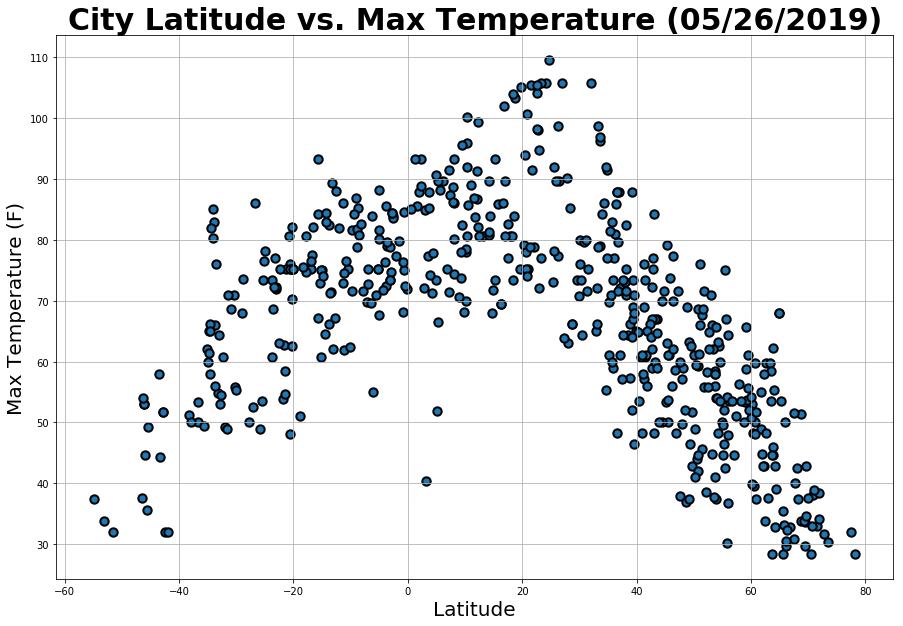

In [36]:
# Create the Latitude vs. Temperature Plot
lat_v_temp_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Max Temperature (F)", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 20)
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Temperature Plot to a png file
plt.savefig("output_data/City_Lat_vs_Temp.png")

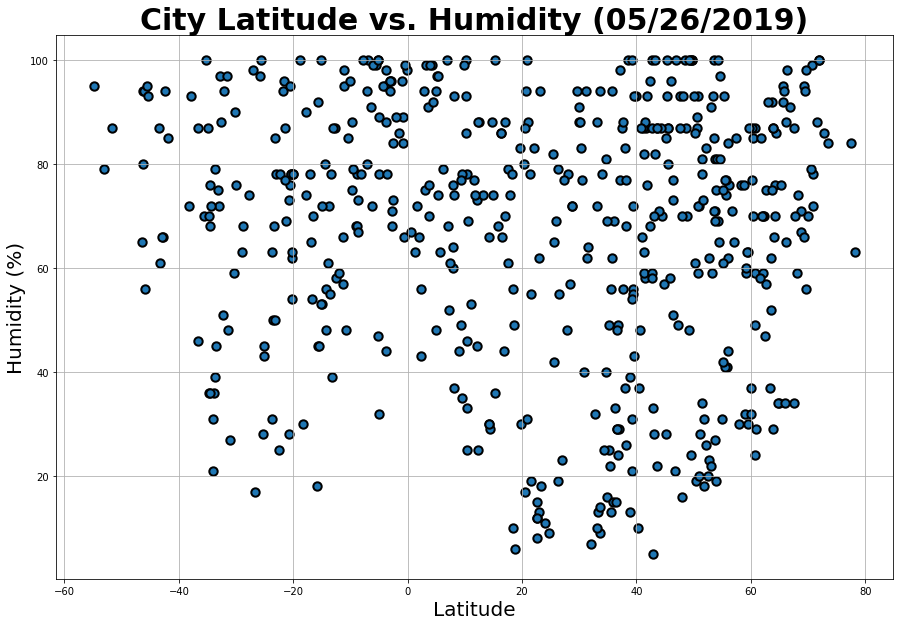

In [37]:
# Create the Latitude vs. Humidity Plot
lat_v_humid_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Humidity", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Humidity Plot to a png file
plt.savefig("output_data/City_Lat_vs_Humid.png")

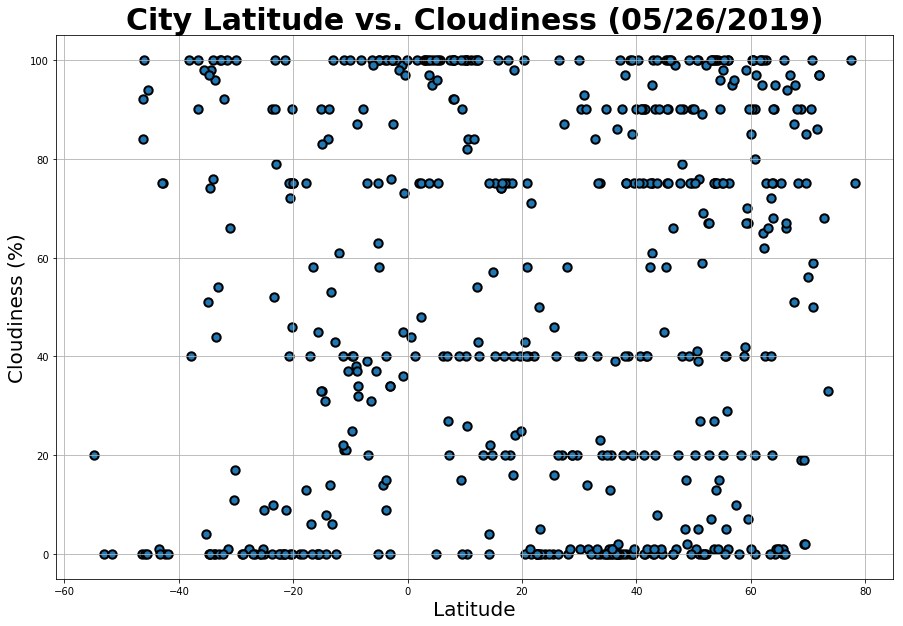

In [38]:
#Latitude vs. Cloudiness Plot
lat_v_cloud_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Cloudiness", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Cloudiness Plot to a png file
plt.savefig("output_data/City_Lat_vs_Cloud.png")

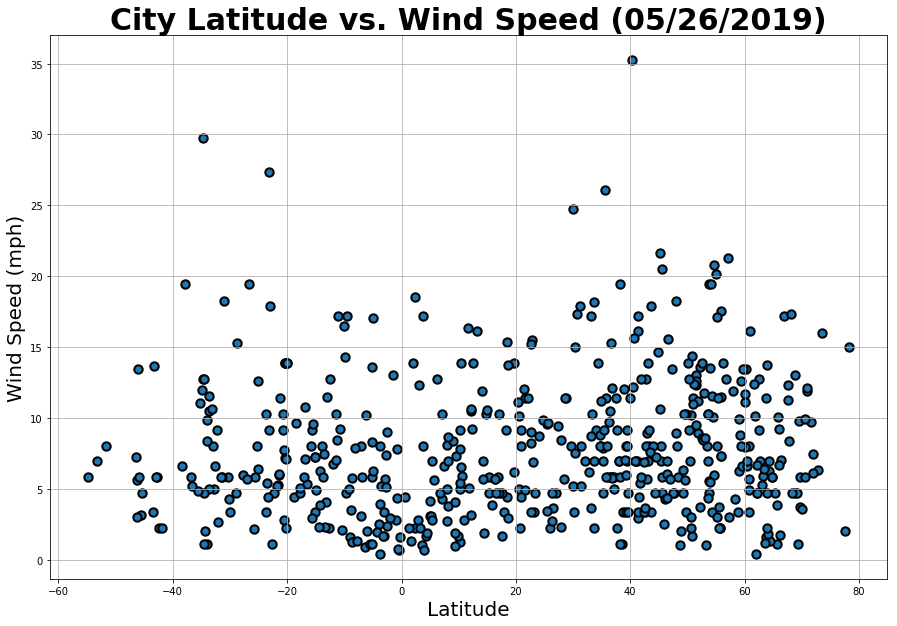

In [39]:
#Latitude vs. Wind Speed Plot
lat_v_wind_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Wind Speed", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )

# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Wind Speed Plot to a png file
plt.savefig("output_data/City_Lat_vs_Wind.png")